In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기
#from konlpy.tag import Kkma 
#from konlpy.tag import Okt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, Normalizer, QuantileTransformer
import seaborn as sns
from sklearn import decomposition
import plotly.express as px

In [15]:
file_path =  "/content/gdrive/My Drive/기계학습/"
data=pd.read_csv(file_path+'Wholesale customers data.csv')
data.head()
#file_full_path=file_path +'cocktails.csv'
#cocktail_df.to_csv(file_full_path ,  index = False, encoding="utf-8-sig")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [36]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)
scaled_frame.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


k: 1 inertia: 3079.999999999999
k: 2 inertia: 2161.817720978819
k: 3 inertia: 1711.5065784887688
k: 4 inertia: 1400.3946023638268
k: 5 inertia: 1144.3363644001563
k: 6 inertia: 1005.9760931534383
k: 7 inertia: 900.3323041443007
k: 8 inertia: 807.2763908276594
k: 9 inertia: 738.9447201719345
k: 10 inertia: 673.2668116821933


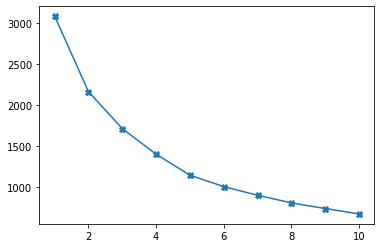

In [37]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++', random_state=0)
    kmeans.fit(scaled_frame)
    inertia.append((k,kmeans.inertia_,))
    print('k:', k, 'inertia:', kmeans.inertia_)
    cluster_labels = kmeans.labels_
inertia_arr=np.array(inertia)
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

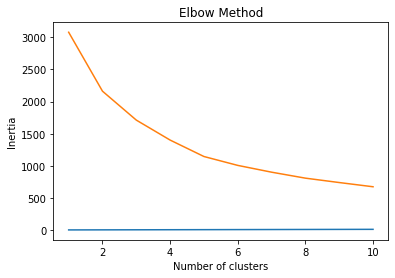

In [39]:
plt.plot(range(1,11),inertia_arr)
#plt.vlines(3, ymin=inertia_arr.min()*0.9999,ymax=inertia_arr.max()*1.0003,linestyles='--',colors='g')
#plt.vlines(4, ymin=inertia_arr.min()*0.9999,ymax=inertia_arr.max()*1.0003,linestyles='--',colors='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
best_n=-1
best_silhouette_score=-1
for k in range(2,20):
  kmeans=KMeans(n_clusters=k,init = 'k-means++', random_state=0)
  kmeans.fit(scaled_frame)
  inertia.append((k,kmeans.inertia_,))
  cluster_labels = kmeans.labels_

  score=silhouette_score(df,cluster_labels)
  #clusters=kmeans.predict(scaled_frame)
  #score=silhouette_score(scaled_frame, clusters)
  #cluster_labels = kmeans.labels_
  print('k:', k, 'score:', score)

  if score>best_silhouette_score:
    best_n=k
    best_silhouette_score=score

print('best n:', best_n, 'best score:', best_silhouette_score)

k: 2 score: 0.2634646820507697
k: 3 score: 0.2086492892474932
k: 4 score: 0.21544087616668933
k: 5 score: 0.2666570870197558
k: 6 score: 0.27103700007266013
k: 7 score: 0.2105983615728784
k: 8 score: 0.24669331400153
k: 9 score: 0.236918418996855
k: 10 score: 0.24204396112750426
k: 11 score: 0.23290448129161112
k: 12 score: 0.21009760408807426
k: 13 score: 0.21351296885917548
k: 14 score: 0.2336695958416898
k: 15 score: 0.13908921930245258
k: 16 score: 0.17309977440784882
k: 17 score: 0.14114271156482303
k: 18 score: 0.2000383629667923
k: 19 score: 0.16441461128603171
best n: 6 best score: 0.27103700007266013


In [ ]:
'''


'''

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


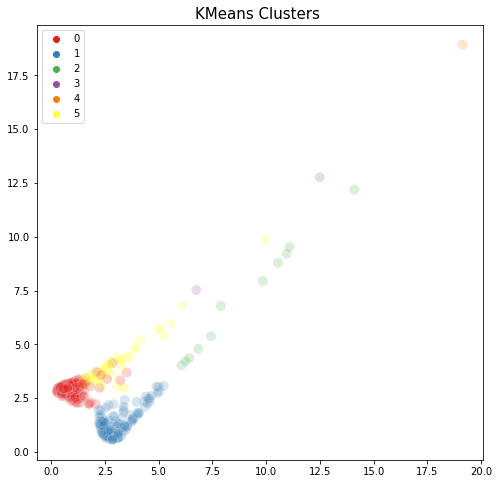

In [58]:
#kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
y_means = kmeans.fit(scaled_frame)
clusters=y_means.transform(scaled_frame)

plt.figure(figsize = (8,8))
sns.scatterplot(clusters[:,0], clusters[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters ', fontsize=15)
plt.legend()
plt.show()